In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import numpy as np
import re

In [102]:
annual_snow_data = pd.read_csv('annualsnow.csv')
current_season_data = pd.read_csv('currentseason.csv')
ski_resorts = pd.read_csv('skiresorts.csv')

annual_snow_data

,Location,Resort,Pass,Year,Total Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
0,utah,Alta,Ikon,2012 - 2013,"366""",76,"50""","52""","113""","17"""
1,utah,Alta,Ikon,2013 - 2014,"353""",68,"64""","60""","124""","14"""
2,utah,Alta,Ikon,2014 - 2015,"278""",56,"44""","42""","90""","19"""
3,utah,Alta,Ikon,2015 - 2016,"286""",60,"51""","51""","116""","19"""
4,utah,Alta,Ikon,2016 - 2017,"304""",55,"64""","63""","145""","19"""
...,...,...,...,...,...,...,...,...,...,...
865,wisconsin,Wilmot Mountain,Epic,2017 - 2018,"37""",15,"6""","10""","28""","8"""
866,wisconsin,Wilmot Mountain,Epic,2018 - 2019,"35""",9,"9""","15""","24""","10"""
867,wisconsin,Wilmot Mountain,Epic,2019 - 2020,"6""",1,"9""","17""","29""","6"""
868,wisconsin,Wilmot Mountain,Epic,2020 - 2021,"22""",11,"9""","10""","20""","5"""


In [103]:
current_season_data

,Location,Resort,Pass,Month,Average Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
0,utah,Alta,Ikon,October,"11""",3.0,"16""","20""","20""","5"""
1,utah,Alta,Ikon,November,"82""",14.0,"45""","45""","65""","16"""
2,utah,Alta,Ikon,December,"76""",13.0,"69""","71""","87""","16"""
3,utah,Alta,Ikon,January,"73""",13.0,"92""","93""","107""","15"""
4,utah,Alta,Ikon,February,"61""",11.0,"106""","106""","118""","14"""
...,...,...,...,...,...,...,...,...,...,...
691,wisconsin,Wilmot Mountain,Epic,January,"8""",3.0,"25""","45""","29""","4"""
692,wisconsin,Wilmot Mountain,Epic,February,"3""",2.0,"20""","38""","30""","2"""
693,wisconsin,Wilmot Mountain,Epic,March,"0""",0.0,"0""","0""","0""","0"""
694,wisconsin,Wilmot Mountain,Epic,April,"0""",0.0,"0""","0""","0""","0"""


In [104]:
current_season_data

,Location,Resort,Pass,Month,Average Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
0,utah,Alta,Ikon,October,"11""",3.0,"16""","20""","20""","5"""
1,utah,Alta,Ikon,November,"82""",14.0,"45""","45""","65""","16"""
2,utah,Alta,Ikon,December,"76""",13.0,"69""","71""","87""","16"""
3,utah,Alta,Ikon,January,"73""",13.0,"92""","93""","107""","15"""
4,utah,Alta,Ikon,February,"61""",11.0,"106""","106""","118""","14"""
...,...,...,...,...,...,...,...,...,...,...
691,wisconsin,Wilmot Mountain,Epic,January,"8""",3.0,"25""","45""","29""","4"""
692,wisconsin,Wilmot Mountain,Epic,February,"3""",2.0,"20""","38""","30""","2"""
693,wisconsin,Wilmot Mountain,Epic,March,"0""",0.0,"0""","0""","0""","0"""
694,wisconsin,Wilmot Mountain,Epic,April,"0""",0.0,"0""","0""","0""","0"""


In [105]:
ski_resorts

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
0,utah,Alta,Ikon,limited,6,11068',2538',8530',119,1.3 mi,...,April 25 20222022/04/25,142,156,84,"547""",NaN,NaN,NaN,NaN,NaN
1,colorado,Arapahoe Basin,Ikon,limited,9,13050',2530',10780',147,1.5 mi,...,June 05 20222022/06/05,270,234,76,"350""",7%,20%,49%,24%,NaN
2,colorado,Aspen Snowmass,Ikon,limited,40,12510',4406',8104',336,5.3 mi,...,April 17 20222022/04/17,148,150,75,"300""",NaN,NaN,NaN,NaN,NaN
3,california,Bear Mountain,Ikon,unlimited,12,8805',1665',7140',15,1.5 mi,...,April 16 20222022/04/16,135,122,79,"100""",20%,33%,33%,13%,NaN
4,montana,Big Sky,Ikon,limited,36,11166',4350',7500',317,6 mi,...,April 24 20222022/04/24,143,144,49,"400""",15%,25%,42%,18%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,michigan,Mt. Brighton,Epic,limited,13,1330',230',1100',25,0.1 mi,...,March 13 20222022/03/13,99,111,62,"60""",24%,44%,24%,8%,130 ac
83,trentino,Pejo,Epic,limited,7,3000m,1600m,1160m,20 km,8 km,...,April 18 20222022/04/18,N.A.,N.A.,N.A.,0cm,NaN,25%,65%,10%,0.9 km
84,trentino,Pinzolo,Epic,limited,14,2100m,1300m,800m,31.4 km,5.2 km,...,April 18 20222022/04/18,N.A.,N.A.,53,0cm,NaN,12%,41%,47%,NaN
85,colorado,Telluride,Epic,limited,17,13150',4425',8725',147,4.6 mi,...,April 17 20222022/04/17,129,136,50,"280""",16%,30%,21%,34%,NaN


**CURRENT SEASON DATA**

In [106]:
ski_resorts.loc[ski_resorts['Resort'] == 'Steamboat', 'Beginners Runs'] = '12%'
ski_resorts.loc[ski_resorts['Resort'] == 'Steamboat', 'Intermediate Runs'] = '38%'
ski_resorts.loc[ski_resorts['Resort'] == 'Steamboat', 'Advanced Runs'] = '40%'
ski_resorts.loc[ski_resorts['Resort'] == 'Steamboat', 'Expert Runs'] = '7%'
ski_resorts

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
0,utah,Alta,Ikon,limited,6,11068',2538',8530',119,1.3 mi,...,April 25 20222022/04/25,142,156,84,"547""",NaN,NaN,NaN,NaN,NaN
1,colorado,Arapahoe Basin,Ikon,limited,9,13050',2530',10780',147,1.5 mi,...,June 05 20222022/06/05,270,234,76,"350""",7%,20%,49%,24%,NaN
2,colorado,Aspen Snowmass,Ikon,limited,40,12510',4406',8104',336,5.3 mi,...,April 17 20222022/04/17,148,150,75,"300""",NaN,NaN,NaN,NaN,NaN
3,california,Bear Mountain,Ikon,unlimited,12,8805',1665',7140',15,1.5 mi,...,April 16 20222022/04/16,135,122,79,"100""",20%,33%,33%,13%,NaN
4,montana,Big Sky,Ikon,limited,36,11166',4350',7500',317,6 mi,...,April 24 20222022/04/24,143,144,49,"400""",15%,25%,42%,18%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,michigan,Mt. Brighton,Epic,limited,13,1330',230',1100',25,0.1 mi,...,March 13 20222022/03/13,99,111,62,"60""",24%,44%,24%,8%,130 ac
83,trentino,Pejo,Epic,limited,7,3000m,1600m,1160m,20 km,8 km,...,April 18 20222022/04/18,N.A.,N.A.,N.A.,0cm,NaN,25%,65%,10%,0.9 km
84,trentino,Pinzolo,Epic,limited,14,2100m,1300m,800m,31.4 km,5.2 km,...,April 18 20222022/04/18,N.A.,N.A.,53,0cm,NaN,12%,41%,47%,NaN
85,colorado,Telluride,Epic,limited,17,13150',4425',8725',147,4.6 mi,...,April 17 20222022/04/17,129,136,50,"280""",16%,30%,21%,34%,NaN


In [107]:
#CONVERTING PERCENTAGES INTO INTEGERS
columns_to_change_2 = ['Summit height', 'Vertical Drop', 'Base Elevation' ,'Beginners Runs', 'Intermediate Runs', 'Advanced Runs', 'Expert Runs', 'Average Snowfall', ]
columns_to_change_Runs = ['Beginners Runs', 'Intermediate Runs', 'Advanced Runs', 'Expert Runs']
columns_to_day = ['Projected Closing', 'Projected Opening']
for col in columns_to_change_2:
    ski_resorts[col] = ski_resorts[col].apply(lambda x: int(re.sub(r'\D', '', x)) if isinstance(x, str) else x)


for col2 in columns_to_day:
    ski_resorts[col2] = ski_resorts[col2].str[-10:]
    ski_resorts[col2] = pd.to_datetime(ski_resorts[col2])

ski_resorts

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
0,utah,Alta,Ikon,limited,6,11068,2538,8530,119,1.3 mi,...,2022-04-25,142,156,84,547,NaN,NaN,NaN,NaN,NaN
1,colorado,Arapahoe Basin,Ikon,limited,9,13050,2530,10780,147,1.5 mi,...,2022-06-05,270,234,76,350,7.0,20.0,49.0,24.0,NaN
2,colorado,Aspen Snowmass,Ikon,limited,40,12510,4406,8104,336,5.3 mi,...,2022-04-17,148,150,75,300,NaN,NaN,NaN,NaN,NaN
3,california,Bear Mountain,Ikon,unlimited,12,8805,1665,7140,15,1.5 mi,...,2022-04-16,135,122,79,100,20.0,33.0,33.0,13.0,NaN
4,montana,Big Sky,Ikon,limited,36,11166,4350,7500,317,6 mi,...,2022-04-24,143,144,49,400,15.0,25.0,42.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,michigan,Mt. Brighton,Epic,limited,13,1330,230,1100,25,0.1 mi,...,2022-03-13,99,111,62,60,24.0,44.0,24.0,8.0,130 ac
83,trentino,Pejo,Epic,limited,7,3000,1600,1160,20 km,8 km,...,2022-04-18,N.A.,N.A.,N.A.,0,NaN,25.0,65.0,10.0,0.9 km
84,trentino,Pinzolo,Epic,limited,14,2100,1300,800,31.4 km,5.2 km,...,2022-04-18,N.A.,N.A.,53,0,NaN,12.0,41.0,47.0,NaN
85,colorado,Telluride,Epic,limited,17,13150,4425,8725,147,4.6 mi,...,2022-04-17,129,136,50,280,16.0,30.0,21.0,34.0,NaN


In [127]:

ski_resorts_cleaned = ski_resorts.dropna(subset=['Beginners Runs', 'Expert Runs'])
ski_resorts_cleaned['Expert Runs'].isnull().value_counts()
ski_resorts_cleaned.to_csv('ski_resorts_cleaned.csv')

In [128]:
ski_resorts_cleaned

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
1,colorado,Arapahoe Basin,Ikon,limited,9,13050,2530,10780,147,1.5 mi,...,2022-06-05,270,234,76,350,7.0,20.0,49.0,24.0,NaN
3,california,Bear Mountain,Ikon,unlimited,12,8805,1665,7140,15,1.5 mi,...,2022-04-16,135,122,79,100,20.0,33.0,33.0,13.0,NaN
4,montana,Big Sky,Ikon,limited,36,11166,4350,7500,317,6 mi,...,2022-04-24,143,144,49,400,15.0,25.0,42.0,18.0,NaN
5,ontario,Blue Mountain,Ikon,unlimited,11,1476,722,755,55,1 mi,...,2022-04-03,149,135,81,110,22.0,33.0,16.0,29.0,260 ac
6,michigan,Boyne Mountain,Ikon,limited,12,1120,500,620,60,1 mi,...,2022-04-24,130,122,74,140,49.0,28.0,20.0,3.0,200 ac
8,colorado,Copper Mountain,Ikon,unlimited,24,12313,2738,9712,150,1.7 mi,...,2022-04-24,163,153,50,300,25.0,24.0,34.0,17.0,NaN
9,washington,Crystal Mountain,Ikon,limited,11,7012,3100,4400,86,2.5 mi,...,2022-05-08,142,N.A.,60,486,8.0,31.0,32.0,29.0,NaN
10,british-columbia,Cypress Mountain,Ikon,limited,6,4751,2008,3012,61,2.5 mi,...,2022-04-10,137,136,47,426,8.0,38.0,34.0,20.0,66 ac
11,utah,Deer Valley,Ikon,limited,21,9570,3000,6570,103,2.8 mi,...,2022-04-17,127,N.A.,42,300,27.0,31.0,10.0,32.0,NaN
12,colorado,Eldora,Ikon,unlimited,10,10600,1400,9200,61,3 mi,...,2022-04-17,170,147,60,311,18.0,48.0,18.0,16.0,NaN


In [108]:
Aura_spots = ['Vail', 'Aspen', 'Breckenridge', 'Telluride', 'Steamboat', 'Copper Mountain', 'Keystone Resort','Jackson Hole', 'Mammoth Mountain']
ski_resorts_selected = ski_resorts[ski_resorts['Resort'].isin(Aura_spots)]
ski_resorts_selected_M = ski_resorts_selected.copy()
ski_resorts_selected_M

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
8,colorado,Copper Mountain,Ikon,unlimited,24,12313,2738,9712,150,1.7 mi,...,2022-04-24,163,153,50,300,25.0,24.0,34.0,17.0,NaN
13,wyoming,Jackson Hole,Ikon,limited,13,10450,4139,6311,131,4.5 mi,...,2022-04-10,136,136,57,459,4.0,41.0,38.0,17.0,NaN
27,colorado,Steamboat,Ikon,unlimited,18,10568,3668,6900,169,3 mi,...,2022-04-10,149,144,59,336,12.0,38.0,40.0,7.0,30 ac
42,colorado,Breckenridge,Epic,unlimited,34,12998,3398,9600,187,3.5 mi,...,2022-05-30,199,204,61,300,13.0,23.0,36.0,28.0,NaN
71,colorado,Vail,Epic,unlimited,31,11570,3450,8120,267,4 mi,...,2022-05-01,156,158,60,354,22.0,34.0,41.0,2.0,NaN
85,colorado,Telluride,Epic,limited,17,13150,4425,8725,147,4.6 mi,...,2022-04-17,129,136,50,280,16.0,30.0,21.0,34.0,NaN


In [109]:
ski_resorts_selected_M.to_csv('Ski_resorts_selected.csv', index= False)
ski_resorts_selected_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 8 to 85
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Location              6 non-null      object        
 1   Resort                6 non-null      object        
 2   Pass                  6 non-null      object        
 3   Limited or unlimited  6 non-null      object        
 4   Total Lifts           6 non-null      int64         
 5   Summit height         6 non-null      int64         
 6   Vertical Drop         6 non-null      int64         
 7   Base Elevation        6 non-null      int64         
 8   Runs in Total         6 non-null      object        
 9   Longest Run           6 non-null      object        
 10  Skiable Terrain       6 non-null      object        
 11  Snow Making           6 non-null      object        
 12  Projected Opening     6 non-null      datetime64[ns]
 13  Projected Closing     6 non-

**SUMMIT HEIGHT**

Text(0, 0.5, 'Summit Height')

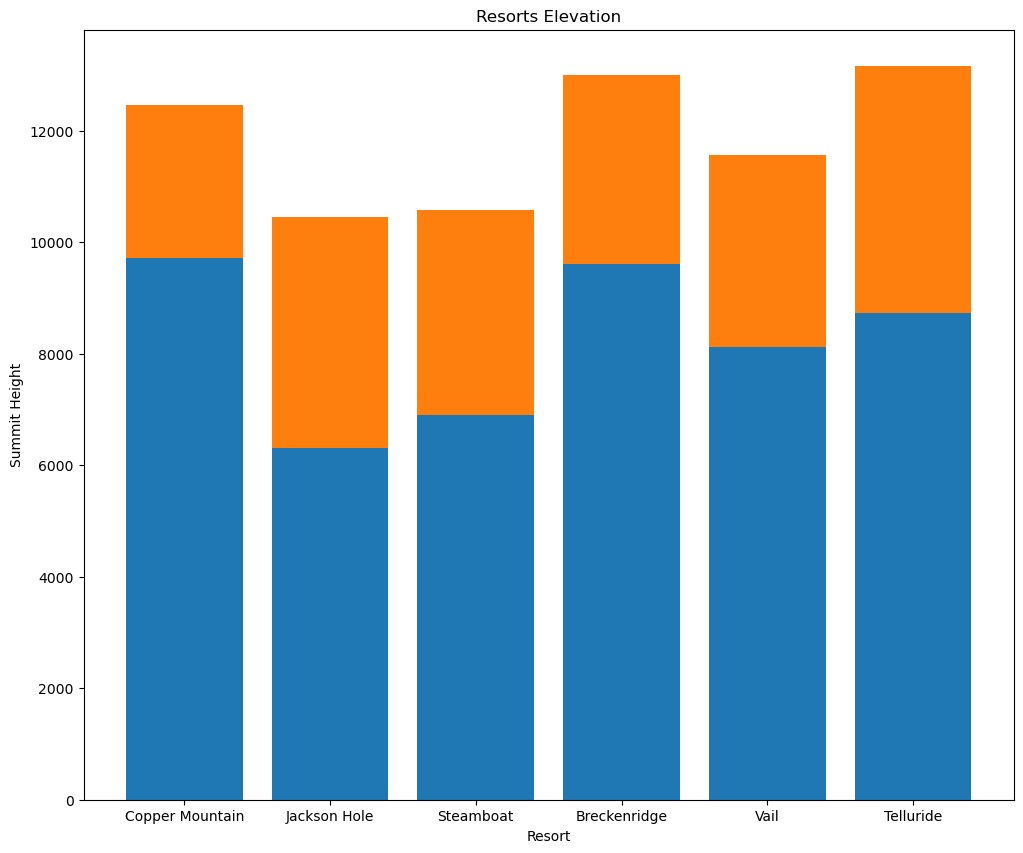

In [56]:
color = []
fig = plt.figure(figsize=(12,10))
plt.bar(ski_resorts_selected_M['Resort'], height= ski_resorts_selected_M['Base Elevation'])
plt.bar(ski_resorts_selected_M['Resort'], height = ski_resorts_selected_M['Vertical Drop'], bottom = ski_resorts_selected_M['Base Elevation'])
plt.title('Resorts Elevation')
plt.xlabel('Resort')
plt.ylabel('Summit Height')

**Runs Breakdown**

In [57]:
#Creating a pie chart 
Copper_mountain_info = ski_resorts_selected_M.loc[8]
Copper_mountain_runs = Copper_mountain_info[columns_to_change_2].values
Jackson_hole_info = ski_resorts_selected_M.loc[13]
Jackson_hole_runs = Jackson_hole_info[columns_to_change_2].values
Steamboat_info = ski_resorts_selected_M.loc[27]
Steamboat_runs = Steamboat_info[columns_to_change_2].values

Copper_mountain_runs


array([12313, 2738, 9712, 25, 24, 34, 17], dtype=object)

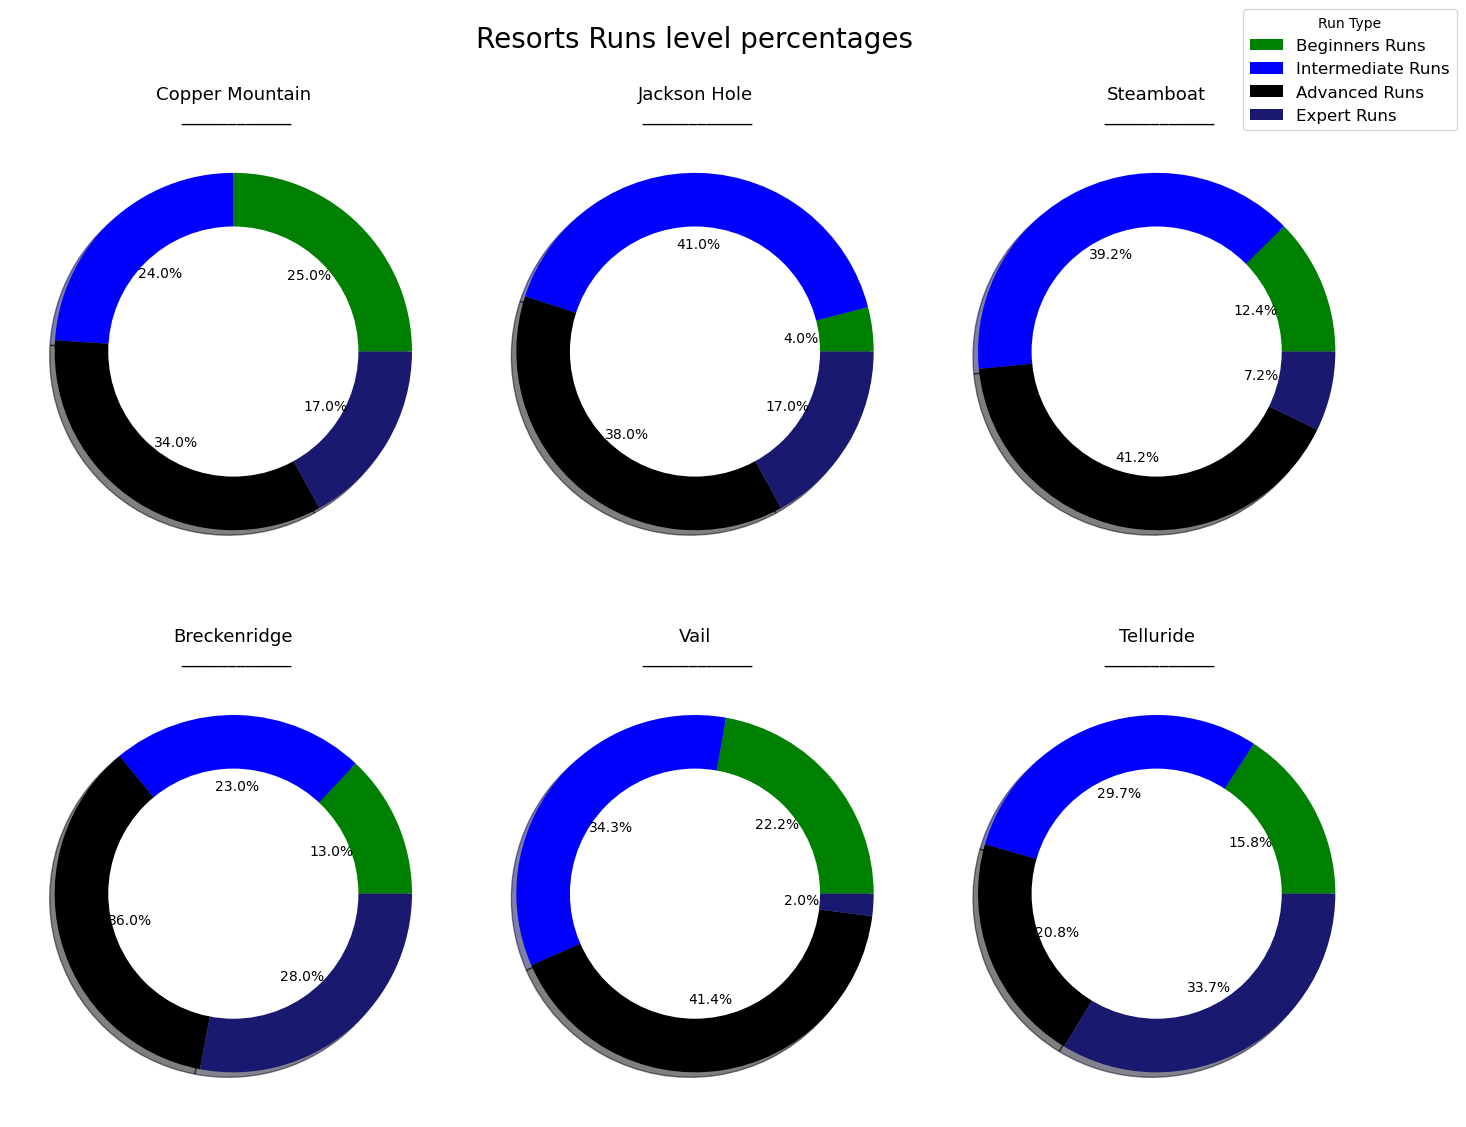

In [65]:

colors = ['Green', 'Blue', 'Black', 'midnightblue']
fig = plt.figure(figsize=(14,12))
plt.suptitle('Resorts Runs level percentages', fontsize = 20)
for i, (index, values) in enumerate(ski_resorts_selected_M.iterrows()):
    runs = values[columns_to_change_Runs].values
    runs = runs.astype(int)
    location = values['Resort']
    plt.subplot(2, 3, i + 1)
    plt.pie(runs, colors = colors, autopct='%1.1f%%', shadow= True)
    center_circle = plt.Circle((0,0), 0.70, fc='white')
    fige = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.gca().set_aspect('equal')
    plt.title(f'{location}\n ____________', fontsize = 13)
    #plt.tight_layout()
fig.legend(columns_to_change_Runs, loc = 'upper right', fontsize = 12, title = 'Run Type', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.show()

**ANNUAL SNOW DATA**

In [81]:
import re

# List of columns to clean
columns_to_change = ['Total Snowfall', 'Average Base Depth', 'Average Summit Depth', 'Max Base Depth', 'Biggest Snowfall']

for col in columns_to_change:    
    # Remove quotes and any non-numeric characters, then convert to integer
    annual_snow_data[col] = annual_snow_data[col].apply(lambda x: int(re.sub(r'\D', '', x)) if isinstance(x, str) else x)

annual_snow_data_aura_spots = annual_snow_data[annual_snow_data['Resort'].isin(Aura_spots)]
annual_snow_data.to_csv('Annual_snow_data_cleaned.csv', index= False)
annual_snow_data_aura_spots.to_csv('Annual_snow_data_selected.csv', index = False)
annual_snow_data_aura_spots


,Location,Resort,Pass,Year,Total Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
80,colorado,Copper Mountain,Ikon,2012 - 2013,237,77,29,28,80,13
81,colorado,Copper Mountain,Ikon,2013 - 2014,352,87,42,47,91,18
82,colorado,Copper Mountain,Ikon,2014 - 2015,254,63,35,39,70,17
83,colorado,Copper Mountain,Ikon,2015 - 2016,247,71,33,40,76,15
84,colorado,Copper Mountain,Ikon,2016 - 2017,246,70,32,39,64,16
85,colorado,Copper Mountain,Ikon,2017 - 2018,202,59,29,37,73,18
86,colorado,Copper Mountain,Ikon,2018 - 2019,246,69,37,52,87,19
87,colorado,Copper Mountain,Ikon,2019 - 2020,201,65,23,32,61,17
88,colorado,Copper Mountain,Ikon,2020 - 2021,185,76,23,27,50,9
89,colorado,Copper Mountain,Ikon,2021 - To Date,188,61,41,48,62,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              870 non-null    object
 1   Resort                870 non-null    object
 2   Pass                  870 non-null    object
 3   Year                  870 non-null    object
 4   Total Snowfall        870 non-null    int64 
 5   Snowfall Days         870 non-null    int64 
 6   Average Base Depth    870 non-null    int64 
 7   Average Summit Depth  870 non-null    int64 
 8   Max Base Depth        870 non-null    int64 
 9   Biggest Snowfall      870 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 68.1+ KB


In [60]:
annual_snow_data['Resort'].unique()

array(['Alta', 'Arapahoe Basin', 'Aspen Snowmass', 'Bear Mountain',
       'Big Sky', 'Blue Mountain', 'Boyne Mountain', 'Brighton',
       'Copper Mountain', 'Crystal Mountain', 'Cypress Mountain',
       'Deer Valley', 'Eldora', 'Jackson Hole', 'June Mountain',
       'Killington', 'Lake Louise', 'Loon Mountain', 'Mammoth',
       'Mt. Bachelor', 'Mt. Norquay', 'Palisades Tahoe', 'Revelstoke',
       'Snow Summit', 'Snowbasin', 'Snowbird', 'Solitude', 'Steamboat',
       'Stratton', 'Sugarbush', 'Sugarloaf', 'Sun Valley', 'Sunday River',
       'Sunshine Village', 'Taos', 'Tremblant', 'Winter Park',
       'Summit at Snoqualmie', 'Snowshoe', 'The Highlands',
       'Windham Mountain', 'Beaver Creek', 'Breckenridge',
       'Brides les Bains', 'Courchevel', 'Fernie',
       'Folgàrida - Marilléva', 'Heavenly', 'Keystone', 'Kicking Horse',
       'Kimberley', 'Kirkwood', 'La Tania', 'Les Menuires',
       'Madonna Di Campiglio', 'Meribel', 'Mont-Sainte-Anne', 'Nakiska',
       'Nendaz'

In [61]:
Aura_spots = ['Vail', 'Aspen', 'Breckenridge', 'Telluride', 'Steamboat', 'Copper Mountain', 'Keystone Resort','Jackson Hole', 'Mammoth Mountain']
Resorts_of_interest = annual_snow_data[annual_snow_data['Resort'].isin(Aura_spots)]
Vail = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Vail']
Breckenridge = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Breckenridge']
Copper_mountain = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Copper Mountain']
Jackson_Hole = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Jackson Hole']
Steamboat = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Steamboat']
telluride = Resorts_of_interest[Resorts_of_interest['Resort'] == 'Telluride']
#Resorts_of_interest

In [62]:
Jackson_Hole_snow_avg = np.mean(Jackson_Hole['Total Snowfall'])
Copper_mountain_snow_avg = np.mean(Copper_mountain['Total Snowfall'])
Vail_snow_avg = np.mean(Vail['Total Snowfall'])
Breckenridge_snow_avg = np.mean(Breckenridge['Total Snowfall'])
Steamboat_snow_avg = np.mean(Steamboat["Total Snowfall"])

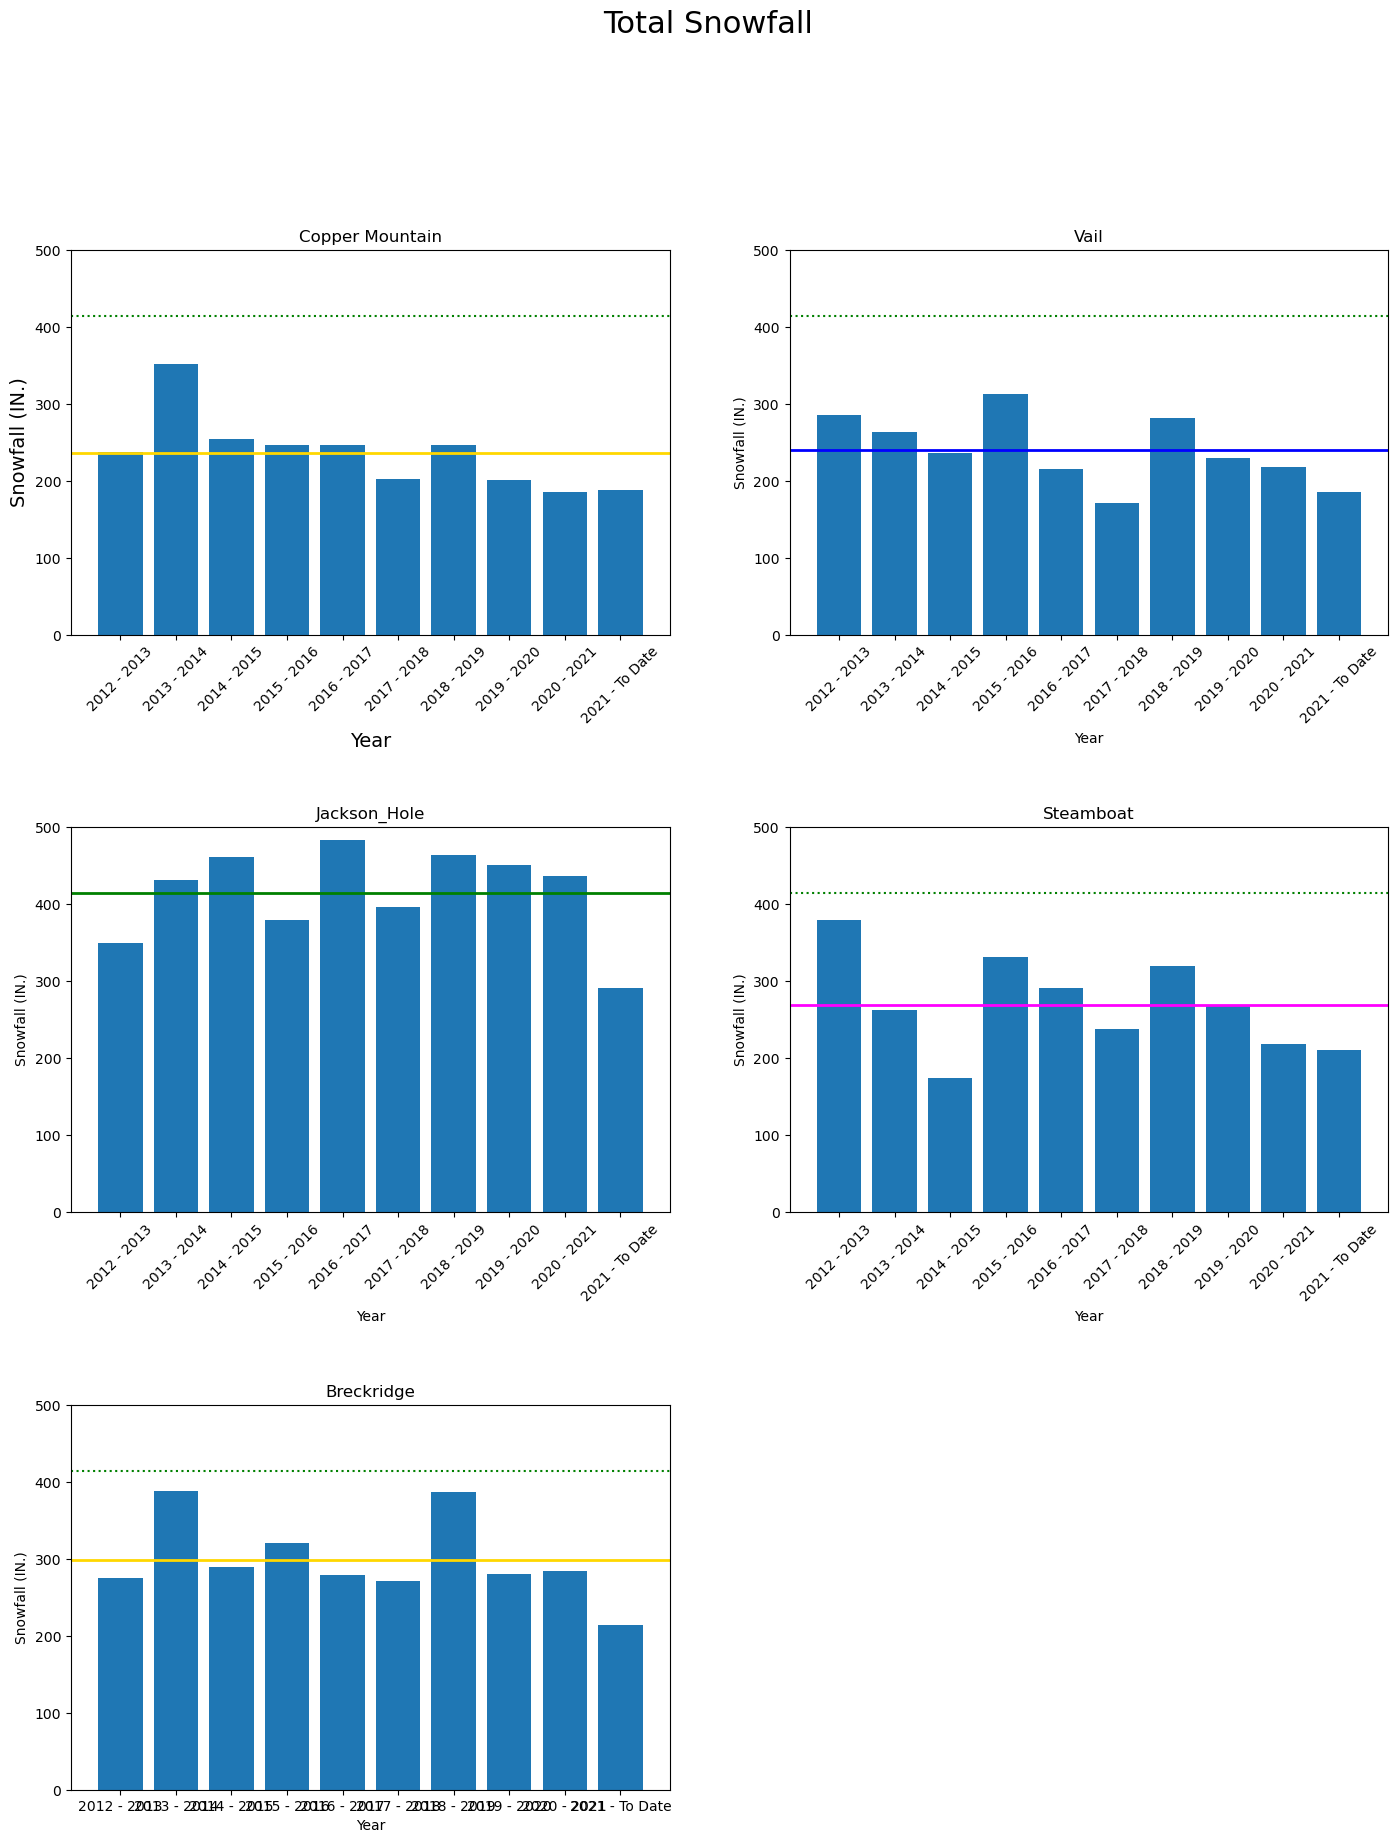

In [63]:

fig = plt.figure(figsize=(17,20))
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Total Snowfall", fontsize = 22, y=1)
plt.subplot(3,2,1)
plt.bar(x = Copper_mountain['Year'], height= Copper_mountain['Total Snowfall'])
plt.xticks(rotation = 45)
plt.ylim(0,500)
plt.axhline(Copper_mountain_snow_avg, color = 'gold', linewidth = 2)
plt.axhline(Jackson_Hole_snow_avg, color = 'green', linestyle = 'dotted')
#plt.annotate("Average")
plt.title('Copper Mountain')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Snowfall (IN.)', fontsize = 14)
plt.subplot(3,2,2)
plt.bar(x = Vail['Year'], height= Vail['Total Snowfall'])
plt.xticks(rotation = 45)
plt.ylim(0,500)
plt.axhline(Vail_snow_avg, color = 'Blue', linewidth = 2)
plt.axhline(Jackson_Hole_snow_avg, color = 'green', linestyle = 'dotted')
plt.title('Vail')
plt.xlabel('Year')
plt.ylabel('Snowfall (IN.)')
plt.subplot(3,2,3)
plt.bar(x = Jackson_Hole['Year'], height= Jackson_Hole['Total Snowfall'])
plt.xticks(rotation = 45)
plt.ylim(0,500)
plt.axhline(Jackson_Hole_snow_avg, color = 'green', linewidth = 2)
plt.title('Jackson_Hole')
plt.xlabel('Year')
plt.ylabel('Snowfall (IN.)')
plt.subplot(3,2,4)
plt.bar(x = Steamboat['Year'], height= Steamboat['Total Snowfall'])
plt.xticks(rotation = 45)
plt.ylim(0,500)
plt.axhline(Steamboat_snow_avg, color = 'magenta', linewidth = 2)
plt.axhline(Jackson_Hole_snow_avg, color = 'green', linestyle = 'dotted')
plt.title('Steamboat')
plt.xlabel('Year')
plt.ylabel('Snowfall (IN.)')
plt.subplot(3,2,5)
plt.bar(x = Breckenridge['Year'], height= Breckenridge['Total Snowfall'])
plt.ylim(0,500)
plt.axhline(Breckenridge_snow_avg, color = 'gold', linewidth = 2)
plt.axhline(Jackson_Hole_snow_avg, color = 'green', linestyle = 'dotted')
plt.title('Breckridge')
plt.xlabel('Year')
plt.ylabel('Snowfall (IN.)')
plt.show()

In [20]:
# columns_to_change = ['Total Snowfall', 'Average Base Depth', 'Average Summit Depth', 'Max Base Depth', 'Biggest Snowfall'] 
# for col in columns_to_change:    
#     annual_snow_data[col] = annual_snow_data[col].apply(lambda x: int(x.replace('"', '').strip()) if isinstance(x, str) else x))
#     annual_snow_data[col] = pd.to_numeric(annual_snow_data[col], errors='coerce', downcast='integer') 

# annual_snow_data

ValueError: invalid literal for int() with base 10: '0cm'